<a href="https://colab.research.google.com/github/MarcusKLY/AI-Stock-Prediction/blob/main/Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import platform
platform.platform()

In [ ]:
import sys
sys.version_info

In [ ]:
!nvidia-smi -L
!cat /proc/cpuinfo

Epoch 1/3
61/61 [==============================] - 10s 47ms/step - loss: 0.0233
Epoch 2/3
61/61 [==============================] - 3s 47ms/step - loss: 0.0037
Epoch 3/3
61/61 [==============================] - 3s 48ms/step - loss: 0.0036


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Prediction: [[87.17418]]
rms error: 4.239692032384383
time(secs): 18.724343299865723


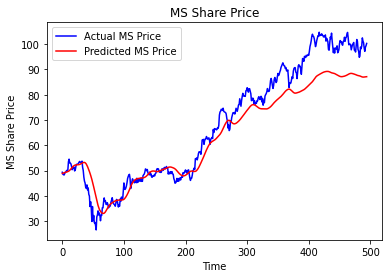

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import time

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# load data
start_time = time.time()
company = 'MS'
epochs = 25
batch_size = 32
units = 60
prediction_days = 60
start = dt.datetime(2012,1,1)
end = dt.datetime(2020,1,1)
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()


#################################################

data = web.DataReader(company, 'stooq', start, end)
data = data[::-1]

# prepare data for model
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))



x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #reshape (x_train, into.....)

# Build The Model
model = Sequential()

# 1 LSTM layer, 1 drop out layer,1 LSTM layer, 1 drop out layer, finally a dense layer
start_time = time.time()
model.add(LSTM(units=units, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=units, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=units)) #no need to return anymore
model.add(Dropout(0.2))
model.add(Dense(units=1)) #prediction of the next closing value

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size) #epochs means the system see the data 24 times #batch_sizes mean the model see 32 data at once
time = ("%s" % (time.time() - start_time))

model.save('model1')
# ''' Test The Model Accuracy on Existing Data '''

# Load Test Data #use model that the program never see before


test_data = web.DataReader(company, 'stooq', test_start, test_end)
test_data = test_data[::-1]
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values # what model is going to see
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

# make predictions on test data

x_test = []

for x in range(prediction_days, len(model_inputs)): #+1 is the newest one
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_text = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


# predict next stock market day

real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs + 1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f'Prediction: {prediction}')
rmse = np.sqrt((np.mean(predicted_prices)-np.mean(actual_prices))**2)

#rmse = np.sqrt(np.mean(np.mean(predicted_prices-actual_prices)**2))
print(f'rms error: {rmse}')
print(f'time(secs): {time}')

# Plot the test Prediction

plt.plot(actual_prices, color='b', label=f'Actual {company} Price')
plt.plot(predicted_prices, color='r', label=f'Predicted {company} Price')
plt.title(f'{company} Share Price')
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.savefig(f'company={company} units={units} epochs={epochs} batch_size={batch_size} tomorrow_prediction={prediction} rmse={rmse} prediction days={prediction_days} model training time(sec)={time}.png', dpi=1000)

In [ ]:
# Python3 implementation of Min Heap

import sys

class MinHeap:

	def __init__(self, maxsize):
		self.maxsize = maxsize
		self.size = 0
		self.Heap = [0]*(self.maxsize + 1)
		self.Heap[0] = -1 * sys.maxsize
		self.FRONT = 1

	# Function to return the position of
	# parent for the node currently
	# at pos
	def parent(self, pos):
		return pos//2

	# Function to return the position of
	# the left child for the node currently
	# at pos
	def leftChild(self, pos):
		return 2 * pos

	# Function to return the position of
	# the right child for the node currently
	# at pos
	def rightChild(self, pos):
		return (2 * pos) + 1

	# Function that returns true if the passed
	# node is a leaf node
	def isLeaf(self, pos):
		return pos*2 > self.size

	# Function to swap two nodes of the heap
	def swap(self, fpos, spos):
		self.Heap[fpos], self.Heap[spos] = self.Heap[spos], self.Heap[fpos]

	# Function to heapify the node at pos
	def minHeapify(self, pos):

		# If the node is a non-leaf node and greater
		# than any of its child
		if not self.isLeaf(pos):
			if (self.Heap[pos] > self.Heap[self.leftChild(pos)] or
			self.Heap[pos] > self.Heap[self.rightChild(pos)]):

				# Swap with the left child and heapify
				# the left child
				if self.Heap[self.leftChild(pos)] < self.Heap[self.rightChild(pos)]:
					self.swap(pos, self.leftChild(pos))
					self.minHeapify(self.leftChild(pos))

				# Swap with the right child and heapify
				# the right child
				else:
					self.swap(pos, self.rightChild(pos))
					self.minHeapify(self.rightChild(pos))

	# Function to insert a node into the heap
	def insert(self, element):
		if self.size >= self.maxsize :
			return
		self.size+= 1
		self.Heap[self.size] = element

		current = self.size

		while self.Heap[current] < self.Heap[self.parent(current)]:
			self.swap(current, self.parent(current))
			current = self.parent(current)

	# Function to print the contents of the heap
	def Print(self):
		for i in range(1, (self.size//2)+1):
			print(" PARENT : "+ str(self.Heap[i])+" LEFT CHILD : "+
								str(self.Heap[2 * i])+" RIGHT CHILD : "+
								str(self.Heap[2 * i + 1]))

	# Function to build the min heap using
	# the minHeapify function
	def minHeap(self):

		for pos in range(self.size//2, 0, -1):
			self.minHeapify(pos)

	# Function to remove and return the minimum
	# element from the heap
	def remove(self):

		popped = self.Heap[self.FRONT]
		self.Heap[self.FRONT] = self.Heap[self.size]
		self.size-= 1
		self.minHeapify(self.FRONT)
		return popped

# Driver Code
if __name__ == "__main__":
	
	print('The minHeap is ')
	minHeap = MinHeap(15)
	minHeap.insert(53)
	minHeap.insert(66)
	minHeap.insert(209)
	minHeap.insert(62)
	minHeap.insert(32)
	minHeap.insert(41)
	minHeap.insert(22)
	minHeap.insert(36)
	minHeap.insert(26)
	minHeap.minHeap()

	minHeap.Print()
	print("The Min val is " + str(minHeap.remove()))

The minHeap is 
 PARENT : 22 LEFT CHILD : 26 RIGHT CHILD : 32
 PARENT : 26 LEFT CHILD : 36 RIGHT CHILD : 62
 PARENT : 32 LEFT CHILD : 209 RIGHT CHILD : 41
 PARENT : 36 LEFT CHILD : 66 RIGHT CHILD : 53
The Min val is 22


In [ ]:
# Python3 program to illustrate deletion in a Binary Tree

# class to create a node with data, left child and right child.
class Node:
	def __init__(self,data):
		self.data = data
		self.left = None
		self.right = None

# Inorder traversal of a binary tree
def inorder(temp):
	if(not temp):
		return
	inorder(temp.left)
	print(temp.data, end = " ")
	inorder(temp.right)

# function to delete the given deepest node (d_node) in binary tree
def deleteDeepest(root,d_node):
	q = []
	q.append(root)
	while(len(q)):
		temp = q.pop(0)
		if temp is d_node:
			temp = None
			return
		if temp.right:
			if temp.right is d_node:
				temp.right = None
				return
			else:
				q.append(temp.right)
		if temp.left:
			if temp.left is d_node:
				temp.left = None
				return
			else:
				q.append(temp.left)

# function to delete element in binary tree
def deletion(root, key):
	if root == None :
		return None
	if root.left == None and root.right == None:
		if root.key == key :
			return None
		else :
			return root
	key_node = None
	q = []
	q.append(root)
	temp = None
	while(len(q)):
		temp = q.pop(0)
		if temp.data == key:
			key_node = temp
		if temp.left:
			q.append(temp.left)
		if temp.right:
			q.append(temp.right)
	if key_node :
		x = temp.data
		deleteDeepest(root,temp)
		key_node.data = x
	return root

# Driver code
if __name__=='__main__':
  root = Node(53)
  root.left = Node(26)
  root.left.left = Node(36)
  root.left.left.left = Node(66)
  root.left.right = Node(62)
  root.right = Node(32)
  root.right.left = Node(210)
  root.right.right = Node(41)
  print("The tree before the deletion:")
  inorder(root)
  key = 53
  root = deletion(root, key)
  print()
  print("The tree after the deletion;")
  inorder(root)
	
# This code is contributed by Monika Anandan

The tree before the deletion:
66 36 26 62 53 210 32 41 
The tree after the deletion;
36 26 62 66 210 32 41 